In [3]:
from datetime import date, timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Price_Models as pm

est_price_path = './Data/tmp.csv'
df = pd.read_csv(est_price_path, index_col=0)

#df = df[df['symbol'] == 'AAPL']
df_filtered = df[df.lastPrice > 10]
#df_filtered.sort_values('BIN_perc_error')
df_filtered

,symbol,optionType,expiration,strike,lastPrice,lastTradeDate,inTheMoney,maturity,S0,sigma,returns,method
0,AAPL,calls,2023-11-17,70.0,111.95,2023-11-09,True,8,182.169998,0.332236,0.299447,A
1,AAPL,calls,2023-11-17,80.0,102.20,2023-11-09,True,8,182.169998,0.332236,0.299447,A
2,AAPL,calls,2023-11-17,85.0,97.25,2023-11-09,True,8,182.169998,0.332236,0.299447,A
3,AAPL,calls,2023-11-17,90.0,92.00,2023-11-09,True,8,182.169998,0.332236,0.299447,A
4,AAPL,calls,2023-11-17,95.0,87.00,2023-11-09,True,8,182.169998,0.332236,0.299447,A
...,...,...,...,...,...,...,...,...,...,...,...,...
11814,^SPX,puts,2027-12-17,6400.0,1657.47,2022-11-30,True,1843,4080.110107,0.233724,0.097521,E
11815,^SPX,puts,2027-12-17,7200.0,2238.97,2022-11-30,True,1843,4080.110107,0.233724,0.097521,E
11816,^SPX,calls,2027-12-17,3200.0,1263.84,2023-03-13,True,1740,3855.760010,0.230280,0.076703,E
11817,^SPX,puts,2027-12-17,1400.0,21.30,2023-07-05,False,1626,4446.819824,0.224982,0.105387,E


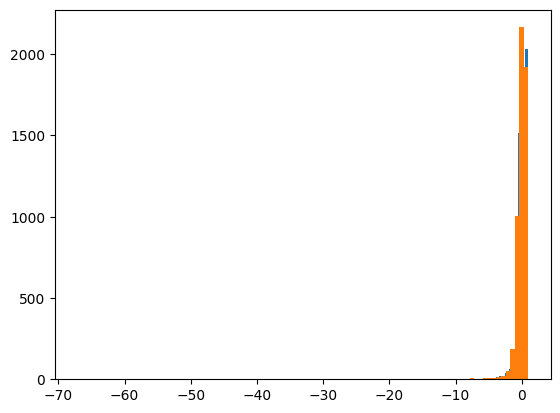

2.6800960005118832 1.202965689937024


In [7]:

plt.hist(df_filtered.MJD_perc_error, bins=100)
plt.hist(df_filtered.BS_perc_error, bins=100)
#plt.hist(BIN_error, bins=100)
plt.show()
averageBS = np.sqrt(np.mean((df_filtered.BS_perc_error)**2))
averageLSMC = np.sqrt(np.mean((df_filtered.MJD_perc_error)**2))
print(averageBS, averageLSMC)

/var/folders/tp/qp7bqb4s1q124w0qwz813fjm0000gn/T/ipykernel_20705/4234422306.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_calls = df[df['optionType'] == 'calls'][df['maturity'] == 10]


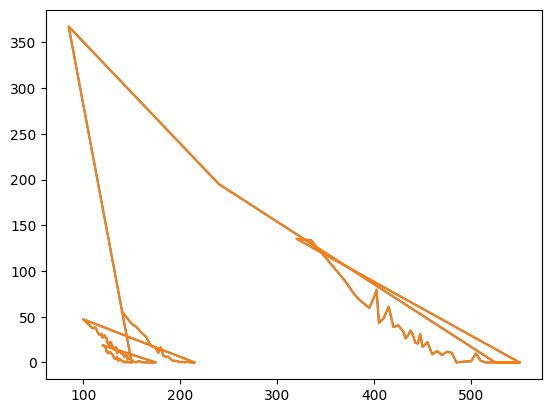

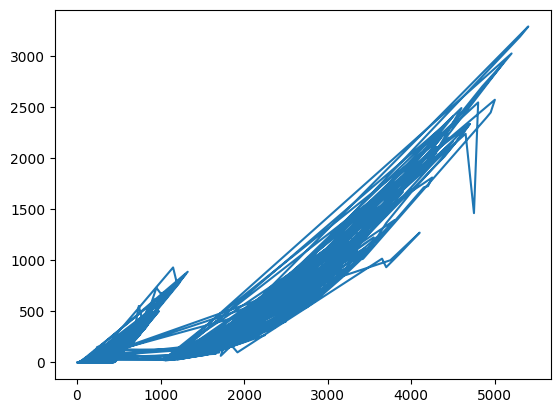

In [54]:
df_calls = df[df['optionType'] == 'calls'][df['maturity'] == 10]
df_puts = df[df['optionType'] == 'puts']
plt.plot(df_calls.strike, df_calls.LSMC_est_price)
plt.plot(df_calls.strike, df_calls.LSMC_est_price)
plt.show()
plt.plot(df_puts.strike, df_puts.lastPrice)
plt.show()

In [9]:
#-- Write ticker names of desired options data --
options_identifiers = '^SPX AAPL AMZN NFLX GOOG'
#-- Write ticker names of desired stock data --
stock_identifier = ['^SPX', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

#-- Write option methods (American = 'A', European = 'E')
methods = ['E', 'A', 'A', 'A', 'A']
df_methods = pd.DataFrame({'identifier': stock_identifier, 'method': methods})

df_methods

,identifier,method
0,^SPX,E
1,AAPL,A
2,AMZN,A
3,NFLX,A
4,GOOG,A
